## Customers' Personality Analysis

### Investigation Overview

In this investigation, I wanted to look at how customers' personality and spending behaviour can be used to direct marketing campaign to them. Our main focus for this study is to look at relationship between the variables in our dataset so as to discover trends in customers' pattern of spending based on their income and some other categorical factors such as educational level and marital status.

### Dataset Overview

Customer Personality Analysis dataset is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. There are total of 2240 customers and 29 variables. However, not all the variables were useful for the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('marketing_campaign.csv', sep='\t')

### Preliminary Wrangling

- Drop extraneous columns. These are columns that are not useful for analysis.
- Convert customers' enrollment date to datetime and extract the year into a new column.
- Order the customers' educational level instead of a plain object type.
- Remove duplicated rows.
- Drop rows with missing values as well as outliers
- Reduce the marital status into just three groups; single, married and others.

In [3]:
# drop extraneous columns
df.drop(['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1, inplace=True)
# convert to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True)
# extract year from date
df['enrol_year'] = df['Dt_Customer'].dt.year

# Educational levels
education_types = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

# Returns the types for education_types with the categories and orderedness
education_types = pd.api.types.CategoricalDtype(ordered=True, categories=education_types)

# Use pandas.astype() to convert the "Education" column from a plain object type into an ordered categorical type 
df['Education'] = df['Education'].astype(education_types);

# remove duplicated rows
df.drop_duplicates(inplace=True)

# drop rows with missing values
df.dropna(axis=0, inplace=True)

# drop outliers
df = df.loc[df['Income'] <= 100000]

#  reduce the marital status into just three groups; single, married and others.
df.loc[df["Marital_Status"].isin(['Alone', 'Widow', 'Divorced']), "Marital_Status"] = 'Single'
df.loc[df["Marital_Status"].isin(['Absurd', 'YOLO']), "Marital_Status"] = 'Other'
df.loc[df["Marital_Status"] == 'Together', "Marital_Status"] = 'Married'

### Distribution of Customers' Income

The customers' income ranges from 1000 to 100,000. There are two plots made; one(left) without scaling and the other(right) with logarithm scaling. The logarithm plot reveal a peak income around 70k.

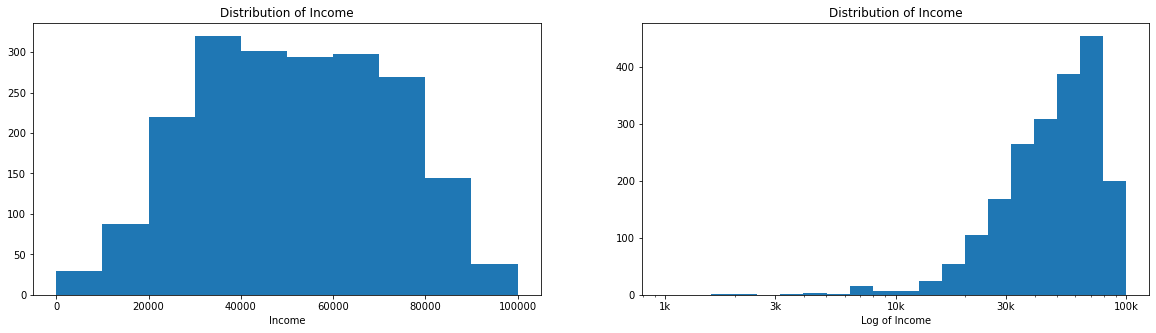

In [4]:
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, without scaling
plt.subplot(1, 2, 1)

bins = np.arange(0, df['Income'].max()+10000, 10000)
plt.hist(data= df, x='Income', bins= bins);
plt.xlabel('Income')
plt.title('Distribution of Income')

# histogram on right, with log scaling
plt.subplot(1, 2, 2)

bins = 10 ** np.arange(3, 5+0.1, 0.1)
plt.hist(data= df, x='Income', bins= bins)
plt.xscale('log')
plt.xticks([1e3, 3e3, 1e4, 3e4, 1e5], ['1k', '3k', '10k', '30k', '100k'])
plt.title('Distribution of Income')
plt.xlabel('Log of Income');

### Distribution of amount spent on some of the products

From the dataset, customers spent their income on wines, fruits, meat products, fish products, sweets and gold. The plots below revealed how the amount customers spent on each products is distributed. The plots are skewed to the right.

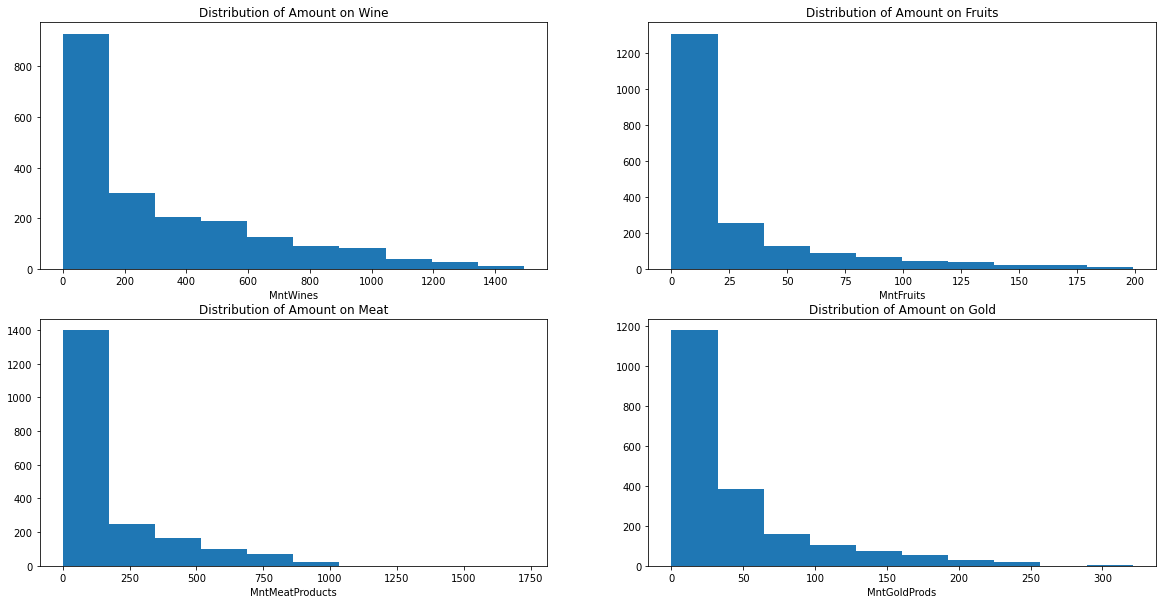

In [5]:
# Set a larger figure size for subplots
plt.figure(figsize = [20, 10]) 

# row 1, col 1, plot 1
plt.subplot(2, 2, 1)

plt.hist(data= df, x='MntWines');
plt.xlabel('MntWines')
plt.title('Distribution of Amount on Wine')

# row 1, col 2, plot 2
plt.subplot(2, 2, 2)

plt.hist(data= df, x='MntFruits');
plt.xlabel('MntFruits')
plt.title('Distribution of Amount on Fruits')

# row 2, col 1, plot 3
plt.subplot(2, 2, 3)

plt.hist(data= df, x='MntMeatProducts');
plt.xlabel('MntMeatProducts')
plt.title('Distribution of Amount on Meat')

# row 2, col 2, plot 4
plt.subplot(2, 2, 4)

plt.hist(data= df, x='MntGoldProds')
plt.xlabel('MntGoldProds')
plt.title('Distribution of Amount on Gold');

### Numbers of Customers based on categorical variables

Categorical variables such as education and marital status as well as discrete numerical variable, Kidhome, are analyzed to visualize the number of customers according to each group of categorical variables. There are more customers at graduation level of education than are others. Married customers are more than single customers while there are only few customers with other status of marraige. It is also revealed that most of the customers have no children.

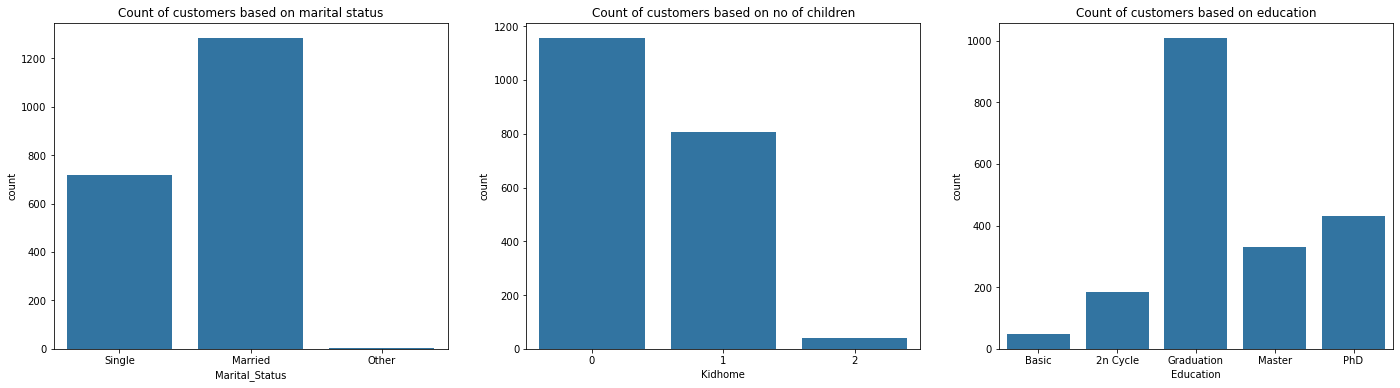

In [6]:
# set base color
bcolor = sns.color_palette()[0]

# use subplot to plot frequency count for other categorical and discrete numerical variable
# set figure for the plots
plt.figure(figsize = [24, 6])

# frequency bar chart of customers according to educational level
plt.subplot(1, 3, 3)
sns.countplot(data= df, x='Education', color=bcolor);
plt.title('Count of customers based on education')

# frequency bar chart of customers according to marital status
plt.subplot(1, 3, 1)
sns.countplot(data= df, x='Marital_Status', color=bcolor);
plt.title('Count of customers based on marital status')

# frequency bar chart of customers according to number of children
plt.subplot(1, 3, 2)
sns.countplot(data= df, x='Kidhome', color=bcolor)
plt.title('Count of customers based on no of children');

### Income vs Amount spent on Wines.

Wine is one of the major products customers spend money on. Plotting log of income against amount spent on wine produces a linear relationship with a linear regression line fitted on the plot. The plot reveals that at lower income, little or no amount is spent on wines. As the income increase, the amount spent on wines increases apparently.

In [7]:
# define a function to transform the income variable
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

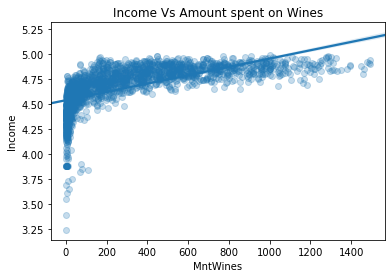

In [8]:
# relationship between customers' income and amount spent on wines.. jitter and transparency applied
sns.regplot(data = df, x = 'MntWines', y = df['Income'].apply(log_trans),
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})
plt.title('Income Vs Amount spent on Wines');

### Pairwise Correlation between Income and amount spent on products

There is a positive relationship between income and amount spent on different products by the customers. Amount spent on wine has the highest corelation with income. There are positive relationships between amount spent on different products as well.

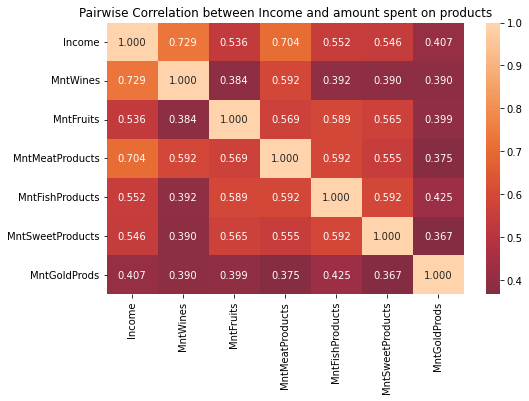

In [9]:
var = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[var].corr(), annot = True, fmt = '.3f', center = 0)
plt.title('Pairwise Correlation between Income and amount spent on products');
plt.show()

### Year over Year trends of Amount spent on different products

Customers joined the company between the year 2012 and 2014. We visualize the trends in market based on the amount customers spend on different products and compare the trends year over year to determine if there is increase in sales or not. The multiple line plot reveals that for all the products, there is a decrease in sales over year. The mean of the amount spent on each product is used as an aggregrate the year.

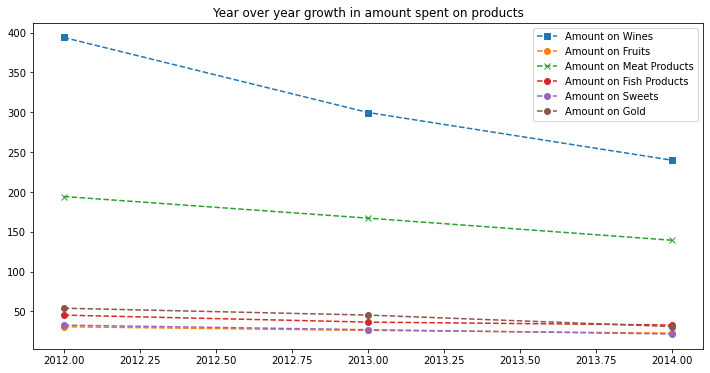

In [10]:
# group the amount spent on each product according to year
avg_amnt = df.groupby('enrol_year')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
# set figure for the line chart
plt.figure(figsize=(12,6))

# plot the line charts 
plt.plot(avg_amnt.index, avg_amnt['MntWines'], linestyle='--', marker='s', label = "Amount on Wines")
plt.plot(avg_amnt.index, avg_amnt['MntFruits'], linestyle='--', marker='o', label = "Amount on Fruits")
plt.plot(avg_amnt.index, avg_amnt['MntMeatProducts'], linestyle='--', marker='x', label = "Amount on Meat Products")
plt.plot(avg_amnt.index, avg_amnt['MntFishProducts'], linestyle='--', marker='o', label = "Amount on Fish Products")
plt.plot(avg_amnt.index, avg_amnt['MntSweetProducts'], linestyle='--', marker='o', label = "Amount on Sweets")
plt.plot(avg_amnt.index, avg_amnt['MntGoldProds'], linestyle='--', marker='o', label = "Amount on Gold")
plt.title('Year over year growth in amount spent on products')
plt.legend()
plt.show()

### Average income of customers of different educational level and marital status

The mean income of the customers according to educational level and marital status is computed. This is plotted with heatmap to determine which educational level and marital status has the highest income on average.
Single customers with basic education has the lowest average income while Married customers with PhD receives the highest average income.

In [11]:
# filter the dataframe to include only single and married customers
df = df.loc[df['Marital_Status'].isin(['Single','Married'])]

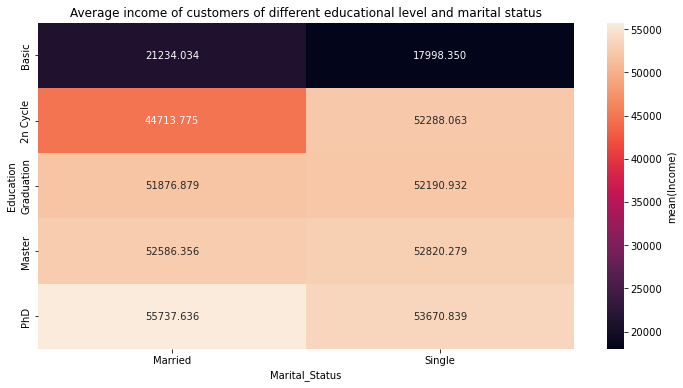

In [12]:
# group by education and marital status and find mean across dataframe. We then isolate the mean income column
cat_means = df.groupby(['Education', 'Marital_Status']).mean()['Income']
cat_means = cat_means.reset_index(name = 'avg_income')
cat_means = cat_means.pivot(index = 'Education', columns = 'Marital_Status',
                            values = 'avg_income')
# plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Income)'})
plt.title('Average income of customers of different educational level and marital status');

In [ ]:
!jupyter nbconvert Communicate_Data_Findings_Part2 --to slides --post serve --no-input --no-prompt